# **Random_Forest for classification Trees**: Preffered for dataset with multiple features
##(*)  Random-Forest is version of Ensemble Learning, which is method in which same algorithm is used multiple times, which emerges much powerful than the original
## (*) In randomForest, we would take any K number of datapoints randomly and make decisionTree associated to it and then again we choose random k-datapoints from the dataset and again make decision tree based upon that, which generated many trees and in every tree the elementery leaves contains the prediction of Y_pred as the X_train datapoint's average of their Y_train under it.
## (*) In that way, we are predicting the forest of trees, that imporoves accuracy of prediction
## Ensemble is more stable and powerful as any changes in the data can reallly imapct the tree but harder to impact the forest of trees

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Importing datasets
dataset=pd.read_csv("Social_Network_Ads.csv")
X=dataset.iloc[:,:-1].values
Y=dataset.iloc[:,-1].values

In [3]:
#Splitting dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [4]:
#FeatureScaling
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X_train=sc_x.fit_transform(X_train)
X_test=sc_x.transform(X_test)

### In randomForest, criterion refers to the function used to measure the quality of a split. The most commonly used criteria are Gini impurity and entropy, entropy measures the amount of information contained in the set. Entropy taught in A-Z course in which based upon the classes splits comes.

In [5]:
#Importing the model and training it on the trainingDataset
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=100,criterion="entropy", random_state=0) #Passed n_estimater=10, denotes number trees no. of tree to be made
#Each tree is an estimator and having same state with instructor both impliment the state=0
classifier.fit(X_train,Y_train)
#The output relies on a Xth numberes tree, after it the output become constant as it dependes upon the dataset as No.of_feature is very less then at small number of tree we would get required output but if No.Of_features are large then Xth would be large
#Like here the output get saturates means very less changes comes after 10 and get required ans, before it hyperchanges comes wrt larger and smaller


RandomForestClassifier(criterion='entropy', random_state=0)

In [6]:
#Prediciting
classifier.predict(sc_x.transform([[30,87000]]))

array([0])

In [7]:
#Predicting the testingResult
Y_pred=classifier.predict(X_test)
print(np.column_stack((Y_pred,Y_test)))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]]


In [8]:
#ConfusionMatrix
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_pred)

array([[55,  3],
       [ 2, 20]])

In [9]:
#AccuracyScore
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.9375

<ipython-input-10-f736a1f07230>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)


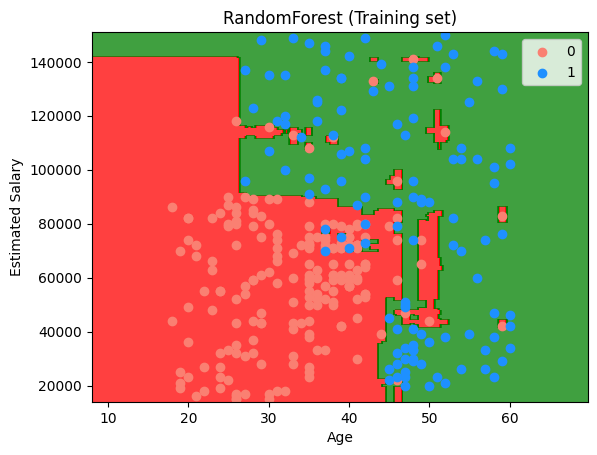

In [10]:
#Visualisation of training result
from matplotlib.colors import ListedColormap
X_set,Y_set= sc_x.inverse_transform(X_train),Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),## StepSize decides the smoothness of the curve
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc_x.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)
plt.title('RandomForest (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

<ipython-input-11-f9da41f04c81>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)


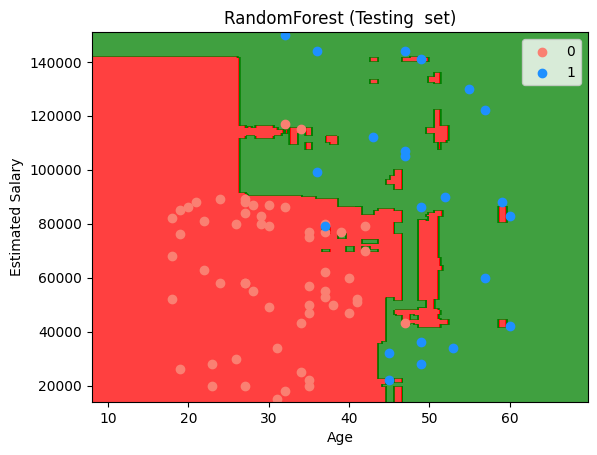

In [11]:
#Visualisation of testing result
from matplotlib.colors import ListedColormap
X_set,Y_set= sc_x.inverse_transform(X_test),Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),## StepSize decides the smoothness of the curve
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc_x.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1], c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)
plt.title('RandomForest (Testing  set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()